# 
# 
# Signal processing / System identification

## Stages with Inputs
### Signal processing (Consider two analyses in different frequency bands)
- ~~Filter and Decimation (IIR Filter)~~ (sample has been sampled already in the desired frequency band to keep uq less complex)
    - $M = $ ~~Number of IIR filter coefficients ("order")~~
    - $f_c =$ ~~Filter 3 dB cutoff frequency~~
    - $d = $ ~~Decimation rate (every d-th sample)~~
- $\hat{\Phi}(\omega)$ Spectral estimator (Welch, Blackman-Tukey)
    - Time / Lag Window (Default Hamming is chosen for Welch's estimator, besides PSDs are used only in pLSCF and there, usage of an exponential window is undisputed)
    - $ 2 (M - 1) = n_\mathrm{lines}$ Number of time lags ↔ number of frequency lines ($\tau_\mathrm{max} = M \Delta t$ Correlation length ↔ Frequency Resolution $\Delta f = \frac{f_s}{n_\mathrm{lines}}$)
- use reference based OMA ($n_\mathrm{ref} = 2$ Number and $\operatorname{loc}_\mathrm{ref}=201x, 201y$ location of reference channels, always available in acquired signals) 

### Systemidentification
- $n_\mathrm{ord}^\mathrm{max} = $ max model order
- Identification Algorithm (SSI-cov, SSI-data, pLSCF) -> Three case studies

## Outputs
- Cross-validated reconstruction error of the identified system(s)
- Identified:
    - Natural frequencies
    - Damping ratios
    - Mode shapes
    
    
How to choose parameters?

Fixed parameters:

- Number of blocks: $n_b = 40$
- Number of validation sets: $k=10$
- Number of reference channels: $n_r = 2$
    
variable parameters:

- number of channels: $n_l \geq n_r$
- sampling_rate : $f_s$
- number of timesteps: $N$

Number of time lags $M$:

- SSI Data: Number of block-rows + -columns $p + q = M$
- SSICovRef: Number of block-rows/-columns $p = q = \lfloor M / 2\rfloor$    
- pLSCF: Number of frequency lines $n_{+} = \lfloor M / 2\rfloor + 1$ (Since these are positive half-power spectra, the actual number of time-/lag-steps required is $M$)

- segment length: $N_{segment} = \lfloor N / n_b \rfloor$
- Upper limit:
    - $M < N_{segment}$
- Chosen lower limit:
    - $M \geq 10$

Specification of the model order:

- Chosen lower limit: $n_{ord} \geq 10$
- Upper limit: 
    - SSICovRef/ SSIData $n_{ord} \leq n_r \lfloor M / 2\rfloor$
    - pLSCF $n_ord \leq M - 2$


Now, let's ask the experts:
- The number of lags should include at least X cycles of the lowest natural frequency = 0.15 Hz
$M>fs/2/f_0 = 13 ... 116$ (for  $f_{s,max} = 4 ... 35 Hz$)

- The frequency resolution should be smaller than the spacing of natural frequencies
$\Delta f = f_s / M < 0.01$ ($M > f_s/0.01\leq400...3500$


- Number of lags depends on the correlation length and sampling frequency: $M = \tau_\mathrm{max} f_s$
- The correlation length $\tau_\mathrm{max}$ should actually be chosen such that,
    - enough cycles (of the first mode) are contained ($T_0 = 1 / f_0 = 6.4 s$) 
    - enough cycles are contained to estimate damping (even though it is not a fit of the exponential decay, and it might not depend on the correlation length)
        - enough could be 3 to 100 (depending on the expected damping ratio), typically 10 to 30


- The model order should be at least twice the number of modes in the signals
$n_ord \geq 2 \times 10$
- The model order should not be too high to avoid modal splitting
$ n_ord \leq 200$

 - verification manually or automatic
   - automatic (see UQ_Acqui.ipynb): 
     - MAC might have a problem with rotated modeshapes
     - available for inclusion in mapping and final verification
     - also modeshape order and major/minor direction can be marked for each identified mode to validate any output-only method for mode clustering
   - mode-pairing should be done post-(uq)-sampling

In [17]:
import pickle
import numpy as np


In [9]:
space = np.arange(len(this_X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

In [11]:
from sklearn.cluster import cluster_optics_dbscan

labels = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    # eps=0.00045
    eps=0.00005
)
print(np.unique(labels))

[-1  0  1  2  3  4  5  6  7  8  9]


In [16]:
this_X

NpzFile 'clust_test.npz' with keys: arr_0

[103176, 91069, 91731, 102469, 1199, 97929, 7956, 2119, 98138, 13423] 1199 60920.9 103176


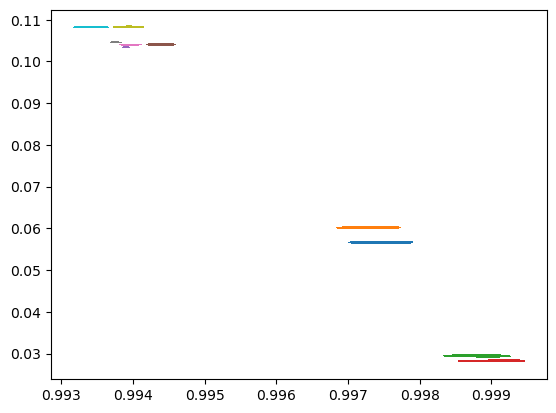

In [20]:
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()

colls = []
sizes = []
for klass in np.unique(labels)[1:]:
    
    Xk = this_X[labels == klass]
    sizes.append(Xk.shape[0])
    # mu_k = np.log(lamda)
    # omega_k = np.abs(mu_k)
    # f_k = omega_k / 2 / np.pi
    # zeta_k = lamda.real/omega_k * 100
    mu_k = np.log(1j*Xk[:,1]+Xk[:,0])

    f_k = np.abs(mu_k)/2/np.pi*35
    zeta_k = 100*np.abs(np.real(mu_k))/np.abs(mu_k)
    
    # a_i = np.abs(np.arctan2(Xk[:,1], Xk[:,0]))
    # b_i = np.log(np.sqrt(Xk[:,1]**2 + Xk[:,0]**2))
    # f_k = a_i/2/np.pi*35
    # zeta_k = 100*np.abs(b_i) / np.sqrt(a_i ** 2 + b_i ** 2)
    colls.append(ax.plot(Xk[:, 0], Xk[:, 1], ls='none',marker=','))
    # plt.plot(f_k,zeta_k, ls='none', marker=',')
    # break
print(sizes, np.min(sizes), np.mean(sizes), np.max(sizes))

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%load_ext snakeviz
%load_ext memory_profiler
# dont forget to forward ports: ssh -L 8080:127.0.0.1:8080 sima9999@makalu47.rz.tu-ilmenau.de

import sys
import os
sys.path.append("/home/sima9999/code/")
sys.path.append("/home/sima9999/git/pyOMA/")
from pathlib import Path


import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from examples.UQ_OMA import vars_definition, stage2mapping,stage3mapping, stage2n3mapping

import ray

from uncertainty.polymorphic_uncertainty import PolyUQ
from uncertainty.data_manager import DataManager

from model.acquisition import Acquire, sensor_position
from helpers import get_pcd

import pyOMA 

from pyOMA.core.PreProcessingTools import PreProcessSignals, GeometryProcessor, SignalPlot
from pyOMA.core.SSICovRef import BRSSICovRef, plot_corr_synth,show_channel_reconstruction
# from pyOMA.core.PLSCF_old import PLSCF as PLSCF_old
from pyOMA.core.PLSCF import PLSCF, plot_spec_synth
from pyOMA.core.SSIData import SSIDataMC, SSIDataCV, plot_sig_synth
from pyOMA.core.PostProcessingTools import MergePoSER
from pyOMA.core.PlotMSH import ModeShapePlot
from pyOMA.core.StabilDiagram import StabilCalc, StabilPlot
from pyOMA.GUI.JupyterGUI import StabilGUIWeb, PlotMSHWeb
from pyOMA.core.PostProcessingTools import pair_modes, compare_modes



import logging


%aimport -sys -logging -matplotlib -matplotlib.pyplot -numpy -pandas

## Parameters

In [3]:
result_dir = Path('/scratch/sima9999/modal_uq/uq_oma_a/')
working_dir = Path('/dev/shm/womo1998/')

## Signal Processing


In [4]:
jid = '98598402_302181fa'
if not isinstance(result_dir, Path):
    result_dir = Path(result_dir)

if not isinstance(working_dir, Path):
    working_dir = Path(working_dir)

    
# Set up directories
if '_' in jid:
    id_ale, id_epi = jid.split('_')
    this_result_dir = result_dir / 'samples' / id_ale
    this_result_dir = this_result_dir / id_epi
    
    seed = int.from_bytes(bytes(id_ale, 'utf-8'), 'big')
else:
    seed = int.from_bytes(bytes(jid, 'utf-8'), 'big')
    
# acqui = Acquire.load(this_result_dir / 'measurement.npz', differential='sampled')    
acqui = Acquire.load(this_result_dir / 'measurement.npz', differential='blablabla')

INFO:model.acquisition:Now loading previous results from  /scratch/sima9999/modal_uq/uq_oma_a/samples/98598402/302181fa/measurement.npz


In [5]:
# acqui = Acquire.load(this_result_dir / 'measurement.npz', differential='blabla')
# acqui.signal_samp = acqui.signal
# acqui.t_vals_samp = np.array([1,2])

In [ ]:
pd_kwargs = acqui.to_prep_data()
ref_channels=np.where(acqui.channel_defs[:,0]==201)[0]

In [18]:
channel_defs = acqui.channel_defs, 
channel_headers = pd_kwargs['channel_headers']

coordinates = np.copy(channel_defs[0])
coordinates[:,1:3] = 0
coordinates = np.roll(coordinates, -1, axis=1)

nodes = {str(coordinates[i*2,2]):list(coordinates[i*2,:]) for i in range(len(channel_headers)//2)}
lines = [([coordinates[i*2,2], coordinates[i*2+2, 2]]) for i in range(len(channel_headers)//2 - 1)]

chan_dofs = []
for i in range(len(channel_defs[0])):
    channel_name = channel_headers[i]
    node = str(coordinates[i,2])
    az, elev = [(0, 0), (270, 0), (90, 0)][channel_defs[0][i,1]]
    chan_dofs.append([i, node, az, elev, channel_name])
    
geometry = GeometryProcessor(nodes, lines)

In [5]:
if True:
    prep_signals = pyOMA.core.PreProcessingTools.PreProcessSignals.load_state(this_result_dir / 'prep_signals.npz')
else:
    prep_signals = pyOMA.core.PreProcessingTools.PreProcessSignals(**pd_kwargs, ref_channels=ref_channels)
# prep_signals.filter_signals(highpass=0.1, lowpass=0.6)
# prep_signals.add_chan_dofs(chan_dofs)

INFO:pyOMA.core.PreProcessingTools:Loading results from  /scratch/sima9999/modal_uq/uq_oma_a/samples/98598402/302181fa/prep_signals.npz


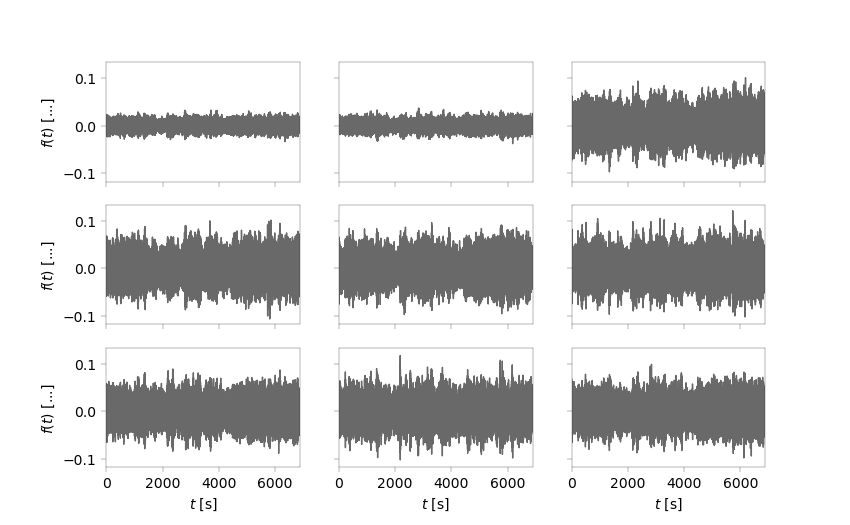

In [6]:
# Fix transients resulting from close-to-DC components in spectral noise  (sensor noise)
# prep_signals.filter_signals(highpass=0.1)
# prep_signals.corr_blackman_tukey(m_lags=prep_signals.m_lags_bt, num_blocks=40)
# prep_signals.decimate_signals(2)
# prep_signals.filter_signals(lowpass=1)
sp = pyOMA.core.PreProcessingTools.SignalPlot(prep_signals)


fig, axes = plt.subplots(3,3, sharex=True, sharey=True)
for channel,ax in enumerate(axes.flat):
    sp.plot_timeseries(channels=[channel], ax=ax, lw=1,color='dimgrey')
# plt.xlim((1574.2067166756779, 1926.3723276619212))
# plt.savefig('/home/sima9999/2019_OMA_UQ/tex/figures/introduction/example_vibration_response.pdf')
# plt.show()

# sp.plot_signals(per_channel_axes=True)
# prep_signals.n_lines_wl = None
# prep_signals.m_lags_wl = None
# prep_signals.corr_welch(m_lags=512, n_segments=50)
# sp.plot_correlation()
# plt.figure()
# plt.plot(prep_signals.var_corr_wl[-1,-1,:])

# prep_signals.corr_blackman_tukey(m_lags=4096, num_blocks=1)#m_lags=973, num_blocks=50)
# sp.plot_signals(channels=prep_signals.ref_channels,per_channel_axes=True,timescale='lags',psd_scale='db')
# sp.plot_correlation()
# fig.axes[0].set_xlim((0,80))
# plt.figure()
# plt.plot(prep_signals.var_corr_bt[-1,-1,:])
# plt.savefig('/home/sima9999/2019_OMA_UQ/tex/figures/introduction/example_spectral2.pdf')

In [7]:
plt.savefig('/home/sima9999/2019_OMA_UQ/tex/figures/introduction/example_noise.pdf')

### decimation

- prior to decimation, the signal has been 
  - largely oversampled [35,70] Hz, (with the intent to reduce sampling noise)
  - mdoerately oversampled [10, 35] Hz, (to account for incomplete knowledge of actual natural frequncies)
  - sampled at the final bandwidth [4, 10] Hz (naive approach)
- the analyst might want to downsample to the desired bandwidth, 
- the analyst has some knowledge from the provided numerical study (with uncertainties) 
  - that the highest natural frequency to identify will be at around 4 Hz (up to fifth-oder modes), 
  - but might also decide modes only up to the third order might be of interest (2 Hz)
- the analyst might be more or less knowledgeable and
  - run the analysis, using the signal as-is (naive approach)
  - downsample moderately (nyquist at twice the highest natural frequency of interest) (conservative approach)
  - downsample agressively (nyquist just above the highest natural frequency of interest) (high-risk approach)
- cutoff frequency / decimation factor must be translated into a meaningful parameter for uq
- final sampling frequency depends on the smaller value of this and the present nyquist rate
- these dependent parameters cannot be used directly for uq
- possible solutions: 
  - define approaches to OMA as parameter sets and do uq over these discrete sets (no optimization possible)
  - actually sampling and downsampling belong together, the choice is to either:
    - oversample and use-as-is out of missing experience (inexperienced)
    - oversample first and then downsample (conservative)
    - sample at the final bandwidth from the beginning (naive)
- **decision**
  - **do'nt do any further decimation here**  

In [6]:
# M = 4
# fc = 1
# d = 2
# prep_signals.decimate_signals(d, nyq_rat = prep_signals.sampling_rate / fc, order=M)

In [33]:
m_lags = 256
n_blocks = 30
prep_signals.corr_matrix_bt = None
prep_signals.corr_blackman_tukey(m_lags, num_blocks=n_blocks, refs_only=True)
pass

DEBUG:pyOMA.core.PreProcessingTools:Not returning because: self.corr_matrix_bt not available
INFO:pyOMA.core.PreProcessingTools:Estimating Correlation Functions (BT) with m_lags=256 and num_blocks=30...
....................................................................................................


DEBUG:pyOMA.core.PreProcessingTools:Arguments psd: n_lines=None, method=None, {'refs_only': True}
DEBUG:pyOMA.core.PreProcessingTools:Returning PSD by Welch's method with 1022 frequency lines, 50 non-overlapping segments and a hamming window...
DEBUG:pyOMA.core.PreProcessingTools:Arguments correlation: m_lags=512, method=None, {'refs_only': True}
DEBUG:pyOMA.core.PreProcessingTools:Returning Correlation Function by Welch's method with 512 time lags and 50 non-overlapping segments.
DEBUG:pyOMA.core.PreProcessingTools:Arguments correlation: m_lags=512, method=None, {'refs_only': True}
DEBUG:pyOMA.core.PreProcessingTools:Returning Correlation Function by Welch's method with 512 time lags and 50 non-overlapping segments.
DEBUG:pyOMA.core.PreProcessingTools:Arguments psd: n_lines=1022, method=None, {'refs_only': True}
DEBUG:pyOMA.core.PreProcessingTools:Returning PSD by Welch's method with 1022 frequency lines, 34 non-overlapping segments and a hamming window...
DEBUG:pyOMA.core.PreProcessi

(array([<AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,

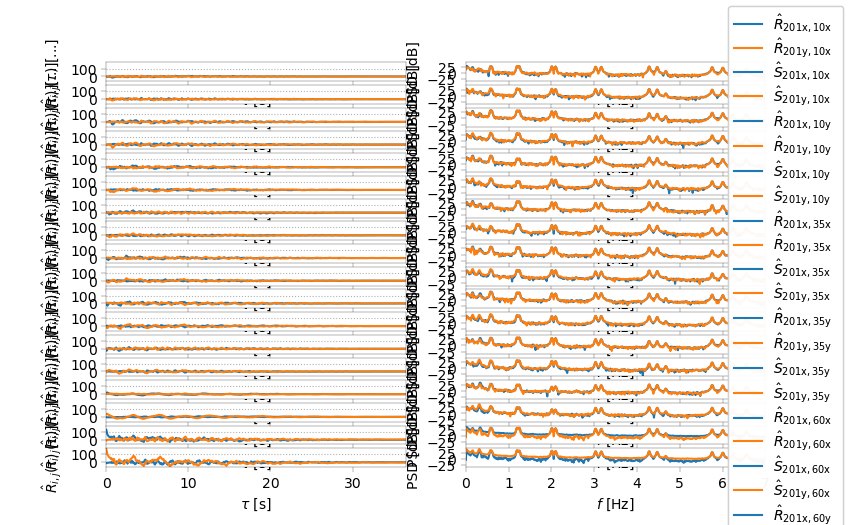

In [35]:
sp = pyOMA.core.PreProcessingTools.SignalPlot(prep_signals)
sp.plot_signals(timescale='lags', psd_scale='db',per_channel_axes=True)

## System Identification

In [62]:
order=120
modal_data = BRSSICovRef(prep_signals)
modal_data.build_toeplitz_cov(prep_signals.m_lags // 2)
A,C,G = modal_data.estimate_state(order)
f,d,phi,lamda = modal_data.modal_analysis(A,C)

INFO:pyOMA.core.SSICovRef:Assembling Toeplitz matrix using pre-computed correlation functions 428 block-columns and 429 block rows
INFO:pyOMA.core.SSICovRef:Decomposing Toeplitz matrix


INFO:pyOMA.core.PostProcessingTools:Statistics on identification: 
Δf = 0.000± 0.000,
Δd = 626.658± 1311.266, 
MAC: mean = 1.000, min= 1.000, 
Number of unmatched modes: "a" 61, "b" 61


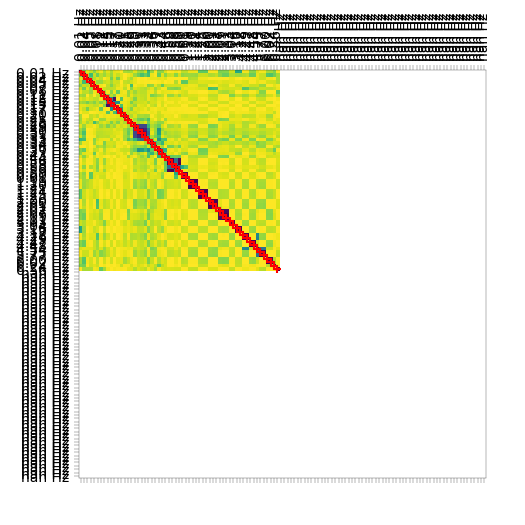

In [64]:
f_ =f
d_ = d
phi_ = phi
compare_modes(f, d, phi,f_, d_, phi_)
pass

## Reconstruction Error method

The reconstruction error of any system identification method is estimated by a $k$-fold cross validation method \cite{arlot...}. A part of the signal is used for system identification, and the system output is validated against the remaining part. System input and output must not necessarily be timestep signals, but can also be correlation functions, spectral densities, or other derived quantities depending on the employed identification method. In the following the method is given for the covariance-driven Stochastic Subspace Identification method.

The measured signal is divided into $n_{blocks}$ blocks for all channels. The correlation function of the signal from two channels $f$ and $g$ is then computed for each of these blocks using the Blackman-Tukey operator $$\hat{R}_{fg}[m] = \frac{1}{N_{block} - m}\sum_{n=0}^{N_{block} - m - 1} f[n] g[n + m] \; \text{,}$$ where $N_{block}$ is the blocklength in timesteps, and $m$ is the lag step of the correlation function. To avoid large confidence intervals of the correlation function for short blocklengths $N_{block}$ and high lags $m$, the second input signal $g[n+m]$ is allowed to overlap into the consecutive block by $m$ timesteps. The average $\hat{R}_{fg}[m]$ over $(k - 1) \lfloor \frac{n_{blocks}}{k}\rfloor $ randomly selected   blocks is used as input for system identification [^1]. The remainig $\lfloor \frac{n_{blocks}}{k}\rfloor $  are used for system validation. 

Given an identified stochstic state-space model in modally decoupled form $$\mathbf{x}_{j}[k+1] = \mathbf{\Lambda}_d \mathbf{x}_{j}[k] + \mathbf{w}_{j}[k]$$ $$ \mathbf{y}[k] = \mathbf{\Phi}x_{j}[k] + \mathbf{v}_{j}[k] \, \text{,}$$ where $j$ is the mode number,  \cite{reynders2012...} have demonstrated the synthetizaton of correlation functions.
$$ \mathbf{\tilde{R}}^\mathfrak{m}_{fg}[m] = \sum_{j=1}^{n_\mathfrak{m}} \lambda_{j}^{m-1}\mathbf{\phi}_{j}\mathbf{g}_{j}^T$$ and the modal participation vector $\mathbf{g}^\mathfrak{m}_{j}$ is the $j^\mathrm{th}$ column of the modally decomposed next-state output covariance matrix $\mathbf{G}^\mathrm{ref} = \mathbf{\Psi} \mathbf{G}^\mathfrak{m}$.
    
[^1]$\frac{1}{n_{blocks}} \sum_{i=1}^{n_{blocks}} \hat{R}_{fg,i}[m] = \hat{R}_{fg,i}[m]$

### Example synthetization

In [42]:
# Warning! Computationally expensive, but needed for nice, smooth spectra :-)
# prep_signals = pyOMA.core.PreProcessingTools.PreProcessSignals(**pd_kwargs, ref_channels=ref_channels)
# prep_signals.add_chan_dofs(chan_dofs)
prep_signals = pyOMA.core.PreProcessingTools.PreProcessSignals.load_state(this_result_dir / 'prep_signals.npz')

filter_freqs = (0.1, 1.5)
prep_signals.filter_signals(highpass=filter_freqs[0],lowpass=filter_freqs[1], overwrite=True)
m_lags = 2048
n_blocks = 1
prep_signals.decimate_signals(1, highpass=0.01)
prep_signals.corr_matrix_bt = None
prep_signals.corr_blackman_tukey(m_lags, num_blocks=n_blocks, refs_only=True)
# prep_signals.corr_welch(m_lags, n_segments=n_blocks, refs_only=True)
pass

INFO:pyOMA.core.PreProcessingTools:Loading results from  /scratch/sima9999/modal_uq/uq_oma_a/samples/8fdfc90a/ee1f66b6/prep_signals.npz
INFO:pyOMA.core.PreProcessingTools:Filtering signals in the band: 0.1 .. 1.5 with a None order butter filter.
INFO:pyOMA.core.PreProcessingTools:Decimating signals by factor 1 and additional highpass filtering at 0.01 to a sampling rate of 13.999999999999998 Hz
INFO:pyOMA.core.PreProcessingTools:Filtering signals in the band: 0.01 .. 5.6 with a 8 order cheby1 filter.
INFO:pyOMA.core.PreProcessingTools:Estimating Correlation Functions (BT) with m_lags=2048 and num_blocks=1...
....................................................................................................


INFO:pyOMA.core.PreProcessingTools:Estimating Power Spectral Density by Blackman-Tukey's method...
....................................................................................................


(array([<AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,j}(\\tau)$ [...]'>,
        <AxesSubplot: xlabel='$\\tau$ [s]', ylabel='$\\hat{R}_{i,

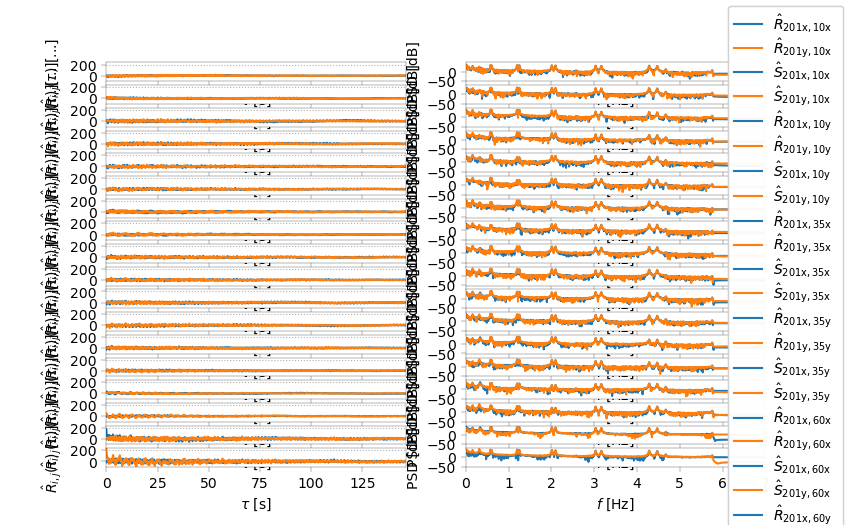

In [6]:
logger= logging.getLogger('pyOMA.core.PreProcessingTools')
logger.setLevel(level=logging.INFO)
sp = pyOMA.core.PreProcessingTools.SignalPlot(prep_signals)
sp.plot_signals(timescale='lags', psd_scale='db',per_channel_axes=True)
# logger.setLevel(level=logging.INFO)

In [76]:
prep_signals._last_meth

'welch'

#### SSICovRef

In [7]:
modal_data = BRSSICovRef(prep_signals)
modal_data.build_toeplitz_cov(1024)

order=28
A, C, G = modal_data.estimate_state(order)
this_modal_frequencies, this_modal_damping, this_mode_shapes, this_eigenvalues, = modal_data.modal_analysis(A, C)
_, this_modal_contributions = modal_data.synthesize_correlation(A, C, G)

INFO:pyOMA.core.SSICovRef:Assembling Toeplitz matrix using pre-computed correlation functions 1024 block-columns and 1025 block rows
INFO:pyOMA.core.SSICovRef:Decomposing Toeplitz matrix


In [22]:
fig1.subplots_adjust(bottom=0.15,left=0.275)

In [ ]:
for i in range(140):
    fig1.axes[0].set_xlim((i, i+10))
    plt.pause(0.1)

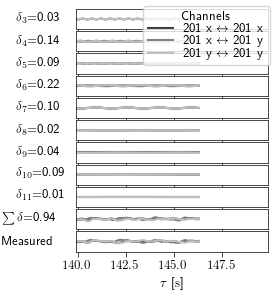

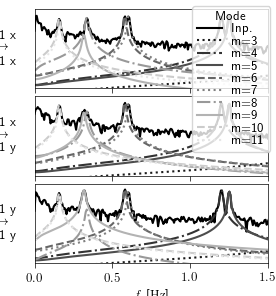

In [31]:
matplotlib.rc('text.latex', preamble=r"\usepackage{siunitx}\usepackage{xfrac}")
from helpers import get_pcd
with matplotlib.rc_context(get_pcd('beamer_half')):  
    fig1, fig2 = plot_corr_synth(modal_data,
                                 modelist = np.where((this_modal_frequencies<1.5) & (this_modal_frequencies>0.015))[0],
                                 # modelist=[2,3,4,5,7,8,9,10],
                                 # modelist=[10,11,12,13,14,15,16], 
                                 # modelist=[0, 1, 2, 3, 4, 5], 
                                 # modelist=[6, 7, 8, 9,10,11], 
                                 channel_inds=[16,17], ref_channel_inds=[0,1])
    fig1.axes[0].set_ylim((-.003,.003))
    fig1.axes[0].set_xlim((0, 40))
    fig2.axes[1].set_xlim((0, 1.5))
    
    
    fig1.subplots_adjust(bottom=0.15,left=0.275)
    for i in range(1400):
        fig1.axes[0].set_xlim((i*0.1, i*0.1+10))
        fig1.savefig(f'/home/sima9999/2019_OMA_UQ/pres/figures/oma/correlation_synthetization_{i}.png')
        fig1.savefig(f'/home/sima9999/2019_OMA_UQ/pres/figures/oma/correlation_synthetization_{i}.pdf')
    # fig1.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/correlation_synthetization.png')
    # fig1.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/correlation_synthetization.pdf')
    # fig2.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/spectrum_synthetization.png')
    # fig2.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/spectrum_synthetization.pdf')

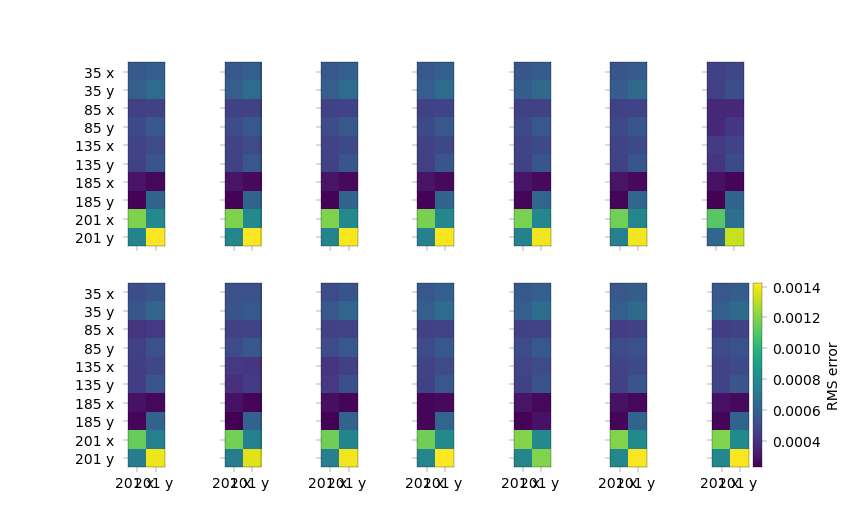

In [348]:
# prep_signals.corr_matrix[-1,-1,:]=0
show_channel_reconstruction(modal_data)

#### pLSCF

In [25]:
modal_data = PLSCF(prep_signals)
modal_data.build_half_spectra()

INFO:pyOMA.core.PLSCF:Constructing half-spectrum matrix ... 
DEBUG:pyOMA.core.PreProcessingTools:Arguments correlation: n_lags=2048, method=None, {}
DEBUG:pyOMA.core.PreProcessingTools:Returning Correlation Function by Welch's method with 2048 time lags and 12 non-overlapping segments.


In [26]:
alpha, beta_l_i = modal_data.estimate_model(35, False)
this_modal_frequencies, this_modal_damping, this_mode_shapes, this_eigenvalues, = modal_data.modal_analysis_residuals(alpha, beta_l_i)
# this_modal_frequencies, this_modal_damping, this_mode_shapes, this_eigenvalues, = modal_data.modal_analysis_state_space(alpha, beta_l_i)

half_spec_modal, modal_contributions = modal_data.synthesize_spectrum(alpha, beta_l_i, modal=True)
# half_spec_rmfd = modal_data.synthesize_spectrum(alpha, beta_l_i, modal=False)

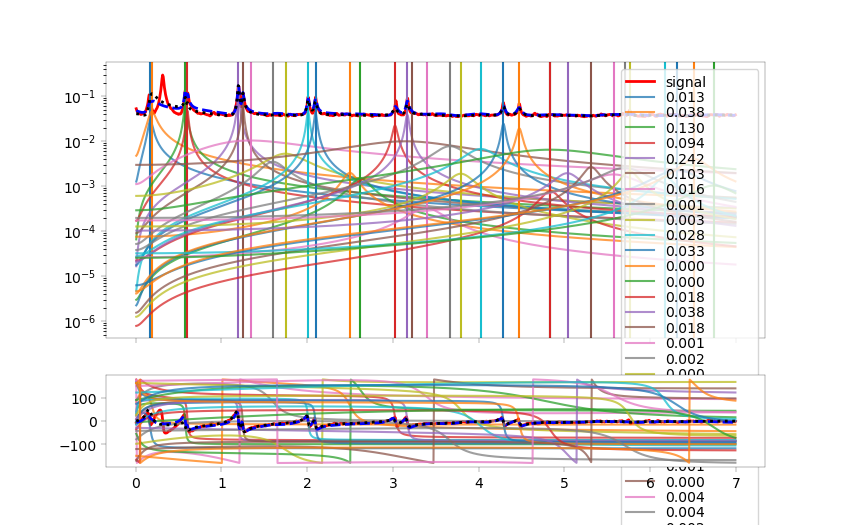

In [40]:
if True:
    num_modes = half_spec_modal.shape[-1]
    channel = 9
    ref_index = 1

    fig1,[ax1,ax2]=plt.subplots(2,1,gridspec_kw={'height_ratios':[3,1]}, sharex=True)

    ax1.plot(modal_data.selected_omega_vector/2/np.pi, np.abs(modal_data.pos_half_spectra[channel,ref_index,:]) , color='red', lw=2, label='signal') 
    ax2.plot(modal_data.selected_omega_vector/2/np.pi, np.angle(modal_data.pos_half_spectra[channel,ref_index,:], deg=True) , color='red', lw=2) 
    ax1.set_yscale('log')
    ylims = ax1.get_ylim()
    for mode in range(num_modes):
        line = ax1.plot(modal_data.selected_omega_vector/2/np.pi, np.abs(half_spec_modal[channel,ref_index,:,mode]), alpha=0.75, label=f'{np.abs(modal_contributions[mode]):1.3f}')
        ax2.plot(modal_data.selected_omega_vector/2/np.pi, np.angle(half_spec_modal[channel,ref_index,:,mode], deg=True), alpha=0.75) 
        ax1.axvline(this_modal_frequencies[mode], color=line[0].get_color())
    
    half_spec_synth = np.sum(half_spec_modal, axis=-1)
    half_spec_synth[:,:,:] += modal_data._lower_residuals[:,:,np.newaxis]
    half_spec_synth[:,:,:] += modal_data._upper_residuals[:,:,np.newaxis]*modal_data.selected_omega_vector[np.newaxis,np.newaxis,:]**2
    
    ax1.plot(modal_data.selected_omega_vector/2/np.pi, np.abs(half_spec_synth[channel,ref_index,:]) , color='blue', lw=2, ls='dashed', label=f'modal {np.abs(np.sum(modal_contributions)):1.3f}') 
    ax2.plot(modal_data.selected_omega_vector/2/np.pi, np.angle(half_spec_synth[channel,ref_index,:], deg=True) , color='blue', lw=2, ls='dashed') 
    modal_data.synthesize_spectrum(alpha, beta_l_i, modal=False)
    ax1.plot(modal_data.selected_omega_vector/2/np.pi, np.abs(modal_data._half_spec_synth[channel,ref_index,:]) , color='black', lw=2, ls='dotted', label='model') 
    ax2.plot(modal_data.selected_omega_vector/2/np.pi, np.angle(modal_data._half_spec_synth[channel,ref_index,:], deg=True) , color='black', lw=2, ls='dotted') 

    # ax1.set_ylim(ylims)
    # ax1.set_xlim((0,1.5))
    ax1.legend()

In [26]:
np.abs(np.sum(modal_contributions))

0.7246477717691745

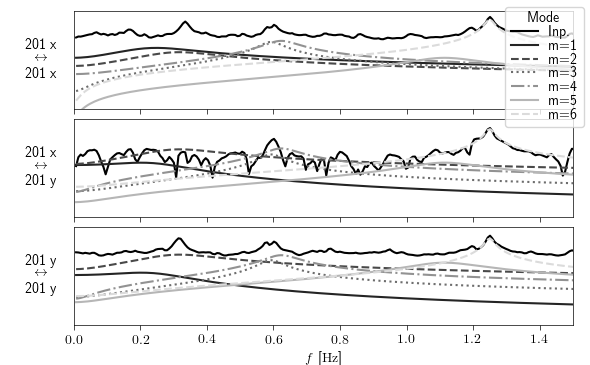

In [27]:
matplotlib.rc('text.latex', preamble=r"\usepackage{siunitx}\usepackage{xfrac}")
from helpers import get_pcd
with matplotlib.rc_context(get_pcd('print')):  
    fig = plot_spec_synth(modal_data,
                    modelist = np.where((this_modal_frequencies<1.5) & (this_modal_frequencies>0.0))[0],
                    channel_inds=[8,9], ref_channel_inds=[0,1])

    fig.axes[1].set_xlim((0, 1.5))
    
    # fig.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/spectrum_synthetization_plscf.png')
    # fig.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/spectrum_synthetization_plscf.pdf')

#### SSIData

In [51]:
modal_data = SSIDataCV(prep_signals)
num_training_blocks = 1
modal_data.build_block_hankel(prep_signals.m_lags // 2, num_blocks=n_blocks, training_blocks=np.random.choice(np.arange(n_blocks), num_training_blocks, False))

INFO:pyOMA.core.SSIData:Building Block-Hankel matrix from  1 out of 40 signal blocks with 169 block-columns and 169 block rows.
DEBUG:pyOMA.core.SSIData:(3398, 35000)
.................................DEBUG:pyOMA.core.SSIData:R shapes: actual: (3398, 875) expected: (3398, 875)
.................................DEBUG:pyOMA.core.SSIData:Q_breve shapes: actual: (875, 875) expected: ,(875, 875)
DEBUG:pyOMA.core.SSIData:Q_breve_j shapes: actual: (875, 875), expected: (875, 875)
..................................
INFO:pyOMA.core.SSIData:Estimating subspace matrix...


In [52]:
A,C,Q,R,S = modal_data.estimate_state(30)
validation_blocks = np.arange(n_blocks)
# validation_blocks = np.array([4,5,6])
this_modal_frequencies, this_modal_damping, this_mode_shapes, this_eigenvalues, = modal_data.modal_analysis(A, C)
all_sig_synth, modal_contributions = modal_data.synthesize_signals( A, C, Q, R, S, validation_blocks)


In [167]:
if False:
    n_validation_blocks = validation_blocks.shape[0]
    num_blocks = modal_data.num_blocks
    total_time_steps = prep_signals.total_time_steps
    q = modal_data.num_block_rows
    p = modal_data.num_block_rows
    N_b = int(np.floor((total_time_steps - q - p) / num_blocks))
    N = N_b * num_blocks
    N_0_offset = total_time_steps - q - p - N
    N_offset = N_b // 15
    block_starts = validation_blocks*N_b + N_0_offset + p + q
    block_starts + N_b + q + p

    channel = 8

    plt.figure()
    t = prep_signals.t
    plt.plot(t, sig[:, channel], c='grey')
    ax = plt.gca()
    fig,axes = plt.subplots(5,2, sharex=True)
    axes = axes.flat
    for i in range(n_validation_blocks):
        sig_synth = all_sig_synth[i]

        ax.plot(t[block_starts[i]:block_starts[i]+N_b],np.sum(sig_synth[channel,:,:] ,axis=-1), alpha=0.5)

        for mode in range(10):

            axes[mode].plot(t[block_starts[i]:block_starts[i]+N_b],sig_synth[channel,:,mode], alpha=0.5)

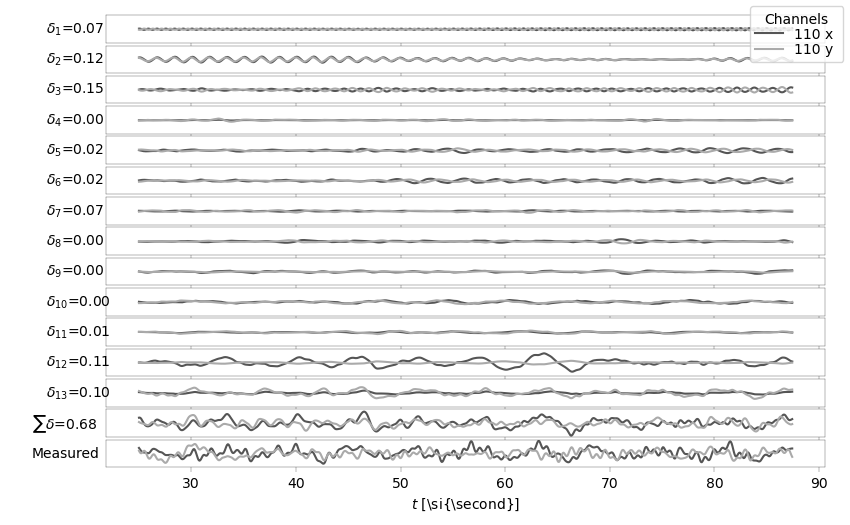

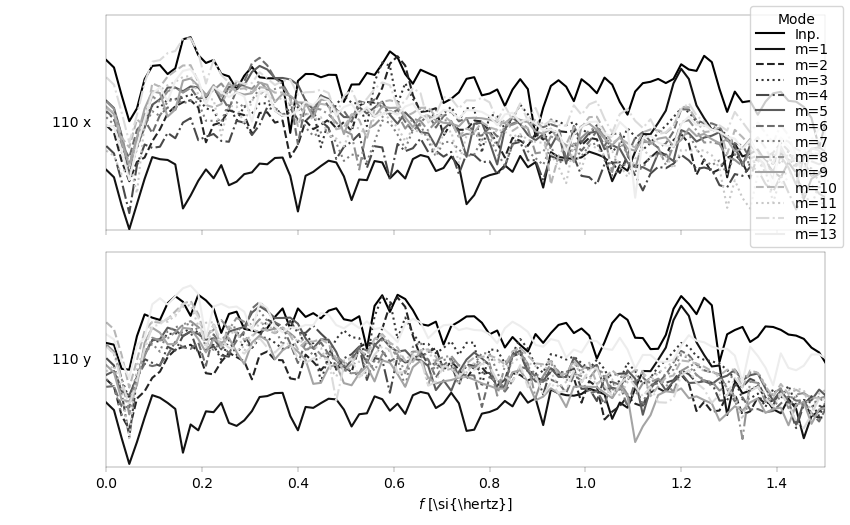

In [53]:
# matplotlib.rc('text.latex', preamble=r"\usepackage{siunitx}\usepackage{xfrac}")

# with matplotlib.rc_context(get_pcd('print')):  
if True:
    fig1, fig2 = plot_sig_synth(modal_data,
                        modelist = np.where((this_modal_frequencies<1.5) & (this_modal_frequencies>0.0))[0],
                        channel_inds=[8,9],i_block=0)
    # fig1.get_axes()[0].set_xlim((1700,1730))
    # fig1.get_axes()[0].set_ylim((-0.2,0.2))
    fig2.get_axes()[0].set_xlim((0,1.5))
    fig2.get_axes()[0].set_ylim(ymin=-40)
    fig2.subplots_adjust(left=None, bottom=None, right=0.97, top=0.97, wspace=None, hspace=0.1,)
    fig1.subplots_adjust(left=None, bottom=None, right=0.97, top=0.97, wspace=None, hspace=0.1,)
    
    # fig1.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/signal_synthetization.png')
    # fig1.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/signal_synthetization.pdf')
    # fig2.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/signal_synthetization_spectrum.png')
    # fig2.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/signal_synthetization_spectrum.pdf')

### Example: Reconstruction Error

The model error with a given parameter set (m_lags, model_order) is sought for by separating the input data into a number of blocks. The sum of modal reconstruction errors is computed on each block model and averaged. This measure can be used to judge on the suitability of the chosen parameter set. However, it is suspectible to overfit. 

How do we penalize overfit?
Overfitted models generally produce almost perfect reconstruction, but achieve that at the cost of many (noise) modes, splitted modes, etc. The number of modes increases, i.e. the "number of directions in the parameter space that are unimportant for prediction" are large. A trade-off between model order and prediction has to be made. This is easily visible in a full-factorial setting or can be found by optimization, but it is not suitable as a UQ criterion, because overfit models would generally perform best.

Wen want the prediction be concentrated to as few modes as possible, i.e. the mean value should be largest? No, because this gives best results at lowest orders.

Additional problem, when modesplitting occurs, one member of the pair may have very high modal contributions, while the other member compensates this with a negative contribution

Its  not known beforehand, how much of the signal can be reconstructed. The question is, how many modes do we need to construct as much of the physical signal (not the noise content) as possible?  An approach would be to segment the sequence of modal contributions of a single model into the modes with high MC and the noise modes. A first approach was to find local minima in estimated kernel densities as the segmentation points. This frequently rejects too many modes (all). A second approach was to find the largest gap in modal contributions (argmax of differences of sorted mcs). That also does not lead to satisfactory results. We seem to have reached a dead-end, where others have failed before and why OMA is generally hard to automate.

We also cannot reject a fixed or a relative number of modes, because we do not know how many physical modes are observable in the signal. Because, ideally, if there is no noise and the right model order is chosen, all modes contribute to the physical signal.


Show a full-factorial example over a range of m_lags and model_orders. Additionally perform a convergence study over the number of blocks.

In [15]:
prep_signals = pyOMA.core.PreProcessingTools.PreProcessSignals(**pd_kwargs, ref_channels=ref_channels)
prep_signals.add_chan_dofs(chan_dofs)


INFO:pyOMA.core.PreProcessingTools:Estimating Correlation Functions (BT) with n_lags=100 and num_blocks=1...
....................................................................................................
INFO:pyOMA.core.PreProcessingTools:Estimating Correlation Functions (BT) with n_lags=200 and num_blocks=1...
....................................................................................................
INFO:pyOMA.core.PreProcessingTools:Estimating Correlation Functions (BT) with n_lags=300 and num_blocks=1...
....................................................................................................


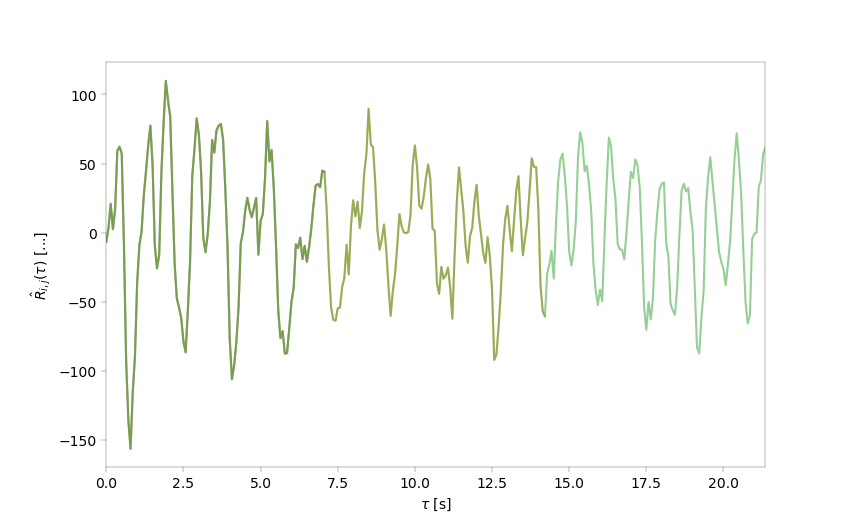

In [7]:
plt.figure()
ax = plt.subplot()
for m_lags in [100,200,300]:
    prep_signals.corr_blackman_tukey(m_lags, refs_only=True)
    pyOMA.core.PreProcessingTools.SignalPlot(prep_signals).plot_correlation(channels=[0], refs=[8], ax=ax, plot_kwarg_dict={'alpha':0.5})
    

In [16]:
n_blocks = 40

k = 10


max_model_order = 40
max_m_lags = 200
n_orders = 37
n_m_lags = 37

orders = np.linspace(max_model_order/10,max_model_order,n_orders, dtype=int)
all_lags = np.linspace(max_m_lags/10,max_m_lags,n_m_lags, dtype=int)

prep_signals.corr_blackman_tukey(max_m_lags, num_blocks=n_blocks, refs_only=True)
pass

INFO:pyOMA.core.PreProcessingTools:Estimating Correlation Functions (BT) with m_lags=200 and num_blocks=40...
....................................................................................................


In [17]:
rng = np.random.default_rng(seed)

cardinality = n_blocks // k
block_indices = np.arange(cardinality*k)
rng.shuffle(block_indices)
block_indices, cardinality


(array([29, 10, 39,  4, 30, 14,  0,  8, 21,  3, 19, 24, 22,  5, 16, 32, 12,
        28, 13, 20, 23, 25,  6, 17,  7, 26,  9, 34, 15, 18, 11, 35, 38, 27,
        31,  2,  1, 33, 37, 36]),
 4)

In [18]:
i=9
test_set = block_indices[i * cardinality:(i + 1) * cardinality]
training_set = np.take(block_indices, np.arange((i + 1) * cardinality, (i + k) * cardinality), mode='wrap')
display(test_set, training_set)

array([ 1, 33, 37, 36])

array([29, 10, 39,  4, 30, 14,  0,  8, 21,  3, 19, 24, 22,  5, 16, 32, 12,
       28, 13, 20, 23, 25,  6, 17,  7, 26,  9, 34, 15, 18, 11, 35, 38, 27,
       31,  2])

In [22]:
meth_ind = 0
method = ['ssicovref', 'plscf', 'ssidata' ][meth_ind]
res_fname = result_dir / ['example_reconstruction_validation.npy', 'example_reconstruction_validation_plscf.npy', 'example_reconstruction_validation_ssidata.npy'][meth_ind]

if os.path.exists(res_fname) and True:
    all_modal_contributions = np.load(res_fname)
else:
    if meth_ind == 0:
        modal_data = BRSSICovRef(prep_signals)
    elif meth_ind == 1:
        modal_data = PLSCF(prep_signals)
    elif meth_ind == 2:
        modal_data = SSIDataCV(prep_signals)
    
    model_performance = np.zeros((n_m_lags, n_orders))
    performance_deviation = np.zeros((n_m_lags, n_orders))
    all_modal_contributions = np.full((n_m_lags, n_orders, k, max_model_order), np.nan)

    for i_m_lags in range(n_m_lags):
        this_m_lags = all_lags[i_m_lags]
        print(this_m_lags//2)
        for i in range(k):

            test_set = block_indices[i * cardinality:(i + 1) * cardinality]
            training_set = np.take(block_indices, np.arange((i + 1) * cardinality, (i + k) * cardinality), mode='wrap')
            
            if meth_ind != 2:
                prep_signals.corr_matrix_bt = np.mean(prep_signals.corr_matrices_bt[training_set,...,:this_m_lags], axis=0)
                prep_signals.n_lines_bt = (this_m_lags - 1) * 2
            
            if meth_ind == 0:
                modal_data.build_toeplitz_cov(int(this_m_lags // 2))
            elif meth_ind == 1:
                modal_data.build_half_spectra(int(this_m_lags),-1,100)
            elif meth_ind == 2:
                modal_data.build_block_hankel(num_block_rows=int(this_m_lags) // 2, num_blocks=n_blocks, training_blocks=training_set)
            
            if meth_ind != 2:
                prep_signals.corr_matrix_bt = np.mean(prep_signals.corr_matrices_bt[test_set,...,:this_m_lags], axis=0)
            
            for i_order in range(n_orders):
                order = orders[i_order]
                
                if modal_data.max_model_order is not None and order>modal_data.max_model_order: continue
                
                if meth_ind == 0:
                    A, C, G = modal_data.estimate_state(order)
                    this_modal_frequencies, this_modal_damping, this_mode_shapes, this_eigenvalues, = modal_data.modal_analysis(A, C)
                    _, this_modal_contributions = modal_data.synthesize_correlation(A, C, G)
                elif meth_ind == 1:
                    alpha, beta_l_i = modal_data.estimate_model(order, False)
                    this_modal_frequencies, this_modal_damping, this_mode_shapes, this_eigenvalues, = modal_data.modal_analysis_residuals(alpha, beta_l_i)
                    _, this_modal_contributions = modal_data.synthesize_spectrum(alpha, beta_l_i, modal=True)
                if meth_ind == 2:
                    A,C,Q,R,S = modal_data.estimate_state(order)
                    this_modal_frequencies, this_modal_damping, this_mode_shapes, this_eigenvalues, = modal_data.modal_analysis(A, C)
                    _, this_modal_contributions = modal_data.synthesize_signals( A, C, Q, R, S, test_set)
                    
                # _, _, _, _, this_modal_contributions = modal_data.single_order_modal(order, synth_corr=True)
                nonzero = this_modal_contributions != 0
                all_modal_contributions[i_m_lags,i_order, i, :np.sum(nonzero)] = this_modal_contributions[nonzero]
    
    np.save(res_fname, all_modal_contributions)
    
    logger.setLevel(level=logging.INFO)


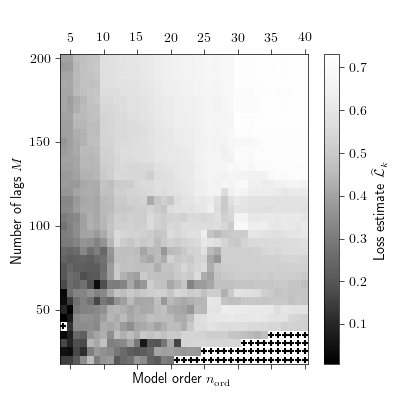

In [23]:
all_modal_contributions2 = np.copy(all_modal_contributions)

#reject noise modes but keep out-of-phase split mode (=negative mc) to counteract high mc of corresponding in-phase mode

if False:
    for i_m_lags in range(n_m_lags):
        for i_order in range(n_orders):

            this_modal_contributions = all_modal_contributions2[i_m_lags, i_order,:,:]
            this_modal_contributions = this_modal_contributions[~np.isnan(this_modal_contributions)]
            this_modal_contributions = np.abs(np.sort(this_modal_contributions))

            if this_modal_contributions.shape[0]<2:continue
            argmax = np.argmax(np.diff(this_modal_contributions))
            thresh = this_modal_contributions[argmax]
            
            this_modal_contributions = all_modal_contributions2[i_m_lags, i_order,:,:]
            indexer = this_modal_contributions**2 <= thresh**2
            all_modal_contributions2[i_m_lags, i_order,  indexer] = np.nan
else:        
    all_negative_contributions = np.copy(all_modal_contributions2)
    all_negative_contributions[all_negative_contributions>=0.0] = np.nan
    all_modal_contributions2[all_modal_contributions2 <=0.0] = np.nan
    pass

#sum over modes, mean over validation sets
model_performance2 = np.nanmean(np.nansum(all_modal_contributions2, axis=3), axis=2)
model_performance3 = np.nanmean(np.nansum(all_negative_contributions, axis=3), axis=2)

model_performance2[model_performance2==0] = np.nan

orderstep = orders[1]-orders[0]
lagstep = all_lags[1]-all_lags[0]

with matplotlib.rc_context(get_pcd('print')):  
    mappable = plt.matshow(model_performance2+model_performance3, 
                           # vmin=0, vmax=1,
                           cmap='Greys_r', 
                extent=[orders[0]-orderstep/2, orders[-1]+orderstep/2,all_lags[0]-lagstep/2, all_lags[-1]+lagstep/2], 
                # extent=[orders[0]-orderstep/2, orders[-1]+orderstep/2,(all_lags[0]-lagstep/2)*2-1, (all_lags[-1]+lagstep/2)*2-1], 
                aspect='auto', origin='lower',
                          interpolation='none')
    cbar = plt.colorbar()
    cbar.set_label('Loss estimate $\widehat{\mathcal{L}}_k$')
    argmax = np.where(np.isnan(model_performance2).T)
    plt.scatter( orders[argmax[0]], all_lags[argmax[1]], marker='+', color='k', s=20)
    # argmax =  np.where(model_performance2.T==model_performance2.max())
    # plt.scatter( orders[argmax[0]], all_lags[argmax[1]], marker='+', color='blue')
    plt.xlabel('Model order $n_\mathrm{ord}$')
    if meth_ind==0:
        plt.ylabel('Number of lags $M$')
    if meth_ind==1:
        plt.ylabel('Number of frequency lines $M$')
    if meth_ind==2:
        plt.ylabel('Number of block rows $q$')
        
    if meth_ind==0:
        plt.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/example_reconstruction_error.png')
        plt.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/example_reconstruction_error.pdf')
    elif meth_ind==1:
        plt.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/example_reconstruction_error_plscf.png')
        plt.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/example_reconstruction_error_plsf.pdf')
    elif meth_ind==2:
        plt.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/example_reconstruction_error_ssidata.png')
        plt.savefig(f'/home/sima9999/2019_OMA_UQ/tex/figures/oma/example_reconstruction_error_ssidata.pdf')

    

# mappable = plt.matshow(model_performance3, 
#                        # vmin=0.01, vmax=1,
#                        cmap='Greys_r', 
#             extent=[orders[0]-orderstep/2, orders[-1]+orderstep/2,all_lags[0]-lagstep/2, all_lags[-1]+lagstep/2], 
#             aspect='auto', origin='lower')
# cbar = plt.colorbar()
# cbar.set_label('Percentage Negative Reconstruction')
# plt.xlabel('Model order')
# plt.ylabel('Number of lags')

# plt.matshow(performance_deviation, cmap='Greys_r', extent=[int(max_model_order/10), max_model_order, int(max_m_lags/10),max_m_lags, ], aspect='auto', origin='lower')
# plt.xlabel('Model order')
# plt.ylabel('Number of lags')
# plt.imshow()

## Modal analysis (manual)

Test the three OMA methods with different parameter sets and signal pre-processing. Parameters are 
- the number of lags $M$ [number of block-rows/-columns $p=q=M$, number of frequency lines $N=(M - 1) 2$]
- the model order $n_{ord}$
- the number of blocks $n_b$, number of (validation and training) sets $k$ -> $n_b/k$ cardinality (validation set size) 

The upper pair of first-order mode at 0.1791 Hz and 0.1797 Hz was not identifiable in any dataset.

In [ ]:
pd_kwargs

In [10]:
n_blocks = 40
m_lags = prep_signals.m_lags
order = 100
k=10

logger= logging.getLogger('pyOMA.core.PreProcessingTools')
logger.setLevel(level=logging.INFO)

# prep_signals = pyOMA.core.PreProcessingTools.PreProcessSignals(**pd_kwargs, ref_channels=[8,9])
# prep_signals.add_chan_dofs(chan_dofs)
# prep_signals.decimate_signals(4)

# prep_signals.corr_blackman_tukey(m_lags, num_blocks=n_blocks, refs_only=True)
# prep_signals.sv_psd()

rng = np.random.default_rng(seed)
cardinality = n_blocks // k
block_indices = np.arange(cardinality * k)
rng.shuffle(block_indices)

# holdout method, single run with a training and test set
i = rng.integers(0, k)

test_set = block_indices[i * cardinality:(i + 1) * cardinality]
training_set = np.take(block_indices, np.arange((i + 1) * cardinality, (i + k) * cardinality), mode='wrap')

training_corr = np.mean(prep_signals.corr_matrices_bt[training_set, ...], axis=0)
test_corr = np.mean(prep_signals.corr_matrices_bt[test_set, ...], axis=0)

### SSICovRef

In [35]:
modal_data = BRSSICovRef(prep_signals)
prep_signals.corr_matrix_bt = training_corr
modal_data.build_toeplitz_cov(m_lags // 2)
prep_signals.corr_matrix_bt = test_corr
modal_data.compute_modal_params(order)

INFO:pyOMA.core.SSICovRef:Assembling Toeplitz matrix using pre-computed correlation functions 224 block-columns and 225 block rows
INFO:pyOMA.core.SSICovRef:Decomposing Toeplitz matrix
INFO:pyOMA.core.SSICovRef:Computing modal parameters...
....................................................................................................


### SSIData

In [11]:
modal_data = SSIDataCV(prep_signals)
num_blocks = 40
num_training_blocks = 30
test_set=None
training_set=None
#training_set=np.random.choice(np.arange(num_blocks),num_training_blocks, False)

In [12]:
rng = np.random.default_rng(int.from_bytes(bytes(id_ale, 'utf-8'), 'big'))

k = num_blocks - num_training_blocks

cardinality = num_blocks // k
block_indices = np.arange(cardinality*k)
rng.shuffle(block_indices)

# holdout method, single run with a training and test set 
i = rng.integers(0,k)

test_set = block_indices[i * cardinality:(i + 1) * cardinality]
training_set = np.take(block_indices, np.arange((i + 1) * cardinality, (i + k) * cardinality), mode='wrap')   

In [14]:
modal_data.build_block_hankel(prep_signals.m_lags // 2, num_blocks=num_blocks, training_blocks=training_set)

INFO:pyOMA.core.SSIData:Building Block-Hankel matrix from  36 out of 40 signal blocks with 169 block-columns and 169 block rows.
....................................................................................................
INFO:pyOMA.core.SSIData:Estimating subspace matrix...


In [15]:
modal_data.compute_modal_params(order, validation_blocks=[1])

INFO:pyOMA.core.SSIData:Computing modal parameters...
....................................................................................................


In [ ]:
order=47
A,C,Q,R,S = modal_data.estimate_state(order)
f_sd, d_sd, phi_sd, lamda_sd, = modal_data.modal_analysis(A, C)
modal_data.synthesize_signals(A,C,Q,R,S, validation_blocks=test_set)

In [47]:
modal_data = SSIDataMC(prep_signals)
modal_data.build_block_hankel(prep_signals.m_lags // 2)

INFO:pyOMA.core.SSIData:Building Block-Hankel matrix with 169 block-columns and 169 block rows
INFO:pyOMA.core.SSIData:Estimating subspace matrix...


In [ ]:
A,C,Q,R,S = modal_data.estimate_state(order)
modal_data.synthesize_signals(A,C,Q,R,S)

In [ ]:
modal_data.compute_modal_params(order)

### pLSCF

In [89]:
modal_data = PLSCF(prep_signals)
modal_data.build_half_spectra()

INFO:pyOMA.core.PLSCF:Constructing half-spectrum matrix ... 


In [63]:
alpha, beta_l_i = modal_data.estimate_model(20, False)
f, d, phi, lamda = modal_data.modal_analysis_state_space(alpha, beta_l_i)

In [64]:
f,d

(array([0.15717232, 0.16490892, 0.31646735, 0.33520901, 0.39495935,
        0.58027002, 0.60378436, 0.86124876, 0.87079511, 0.95610149,
        1.08786106, 1.19941774, 1.24983301, 1.47631295, 1.47818742,
        1.69943175, 1.71612277, 2.01072279, 2.02024187]),
 array([ 0.83213084,  1.97399677,  1.87207564,  1.70015654, 43.33916609,
         0.07278964,  0.11843925,  6.41248785, 12.7111053 ,  1.93741507,
         0.90844684,  0.13388956,  0.11392726,  3.49278681,  2.47907224,
         2.05841631,  1.1080904 ,  0.0852872 ,  0.08044899]))

In [94]:
# modal_data.factor_a = None
modal_data.compute_modal_params(order, complex_coefficients=False, algo='state-space')
modal_data.compute_modal_params(order, complex_coefficients=False, algo='residuals', modal_contrib=True) # state-space: 22s, just residuals: 22s, with modal_contrib: 32s

INFO:pyOMA.core.PLSCF:Computing modal parameters...
...................................................................................................INFO:pyOMA.core.PLSCF:Computing modal parameters...
...................................................................................................

## Stabilization

In [95]:
stabil_calc = StabilCalc(modal_data)
stabil_plot = StabilPlot(stabil_calc)
stabil_plot.show_MC(True)
display(StabilGUIWeb(stabil_plot)[0])

INFO:pyOMA.core.StabilDiagram:Checking stabilisation criteria...
....................................................................................................


## Mode shape visualization

### Manual Stabilization Selection 

In [25]:
mode_shape_plot = ModeShapePlot(amplitude=10,
                                prep_signals=prep_signals,
                                stabil_calc=stabil_calc,
                                geometry_data=geometry,
                                modal_data=stabil_calc.modal_data)

### Numerical Solutions

In [24]:
merged_data = MergePoSER()

merged_data.mean_frequencies = acqui.modal_frequencies_samp[inds_a,np.newaxis]
merged_data.mean_damping = acqui.modal_damping_samp[inds_a,np.newaxis]
merged_data.std_frequencies = np.zeros_like(merged_data.mean_damping)
merged_data.std_damping = np.zeros_like(merged_data.mean_damping)
merged_data.merged_mode_shapes = acqui.mode_shapes_samp[:,np.newaxis,inds_a]# (total_dofs, 1, common_modes)
merged_data.merged_num_channels = merged_data.merged_mode_shapes.shape[0]
merged_data.merged_chan_dofs = chan_dofs

In [25]:
mode_shape_plot_num = ModeShapePlot(amplitude=10,
                               merged_data=merged_data, 
                                geometry_data=geometry,
                               )
mode_shape_plot = mode_shape_plot_num

### Manually Provided Results

In [314]:
this_modal_frequencies, this_modal_damping, this_mode_shapes = f_sd, d_sd, phi_sd
inds_b = ~np.isnan(this_modal_frequencies)
chan_dofs

[[0, '20', 0.0, 0.0, '20 x '],
 [1, '20', 270.0, 0.0, '20 y '],
 [2, '70', 0.0, 0.0, '70 x '],
 [3, '70', 270.0, 0.0, '70 y '],
 [4, '120', 0.0, 0.0, '120 x '],
 [5, '120', 270.0, 0.0, '120 y '],
 [6, '170', 0.0, 0.0, '170 x '],
 [7, '170', 270.0, 0.0, '170 y '],
 [8, '201', 0.0, 0.0, '201 x '],
 [9, '201', 270.0, 0.0, '201 y ']]

In [311]:
merged_data = MergePoSER()

merged_data.mean_frequencies = this_modal_frequencies[inds_b,np.newaxis]
merged_data.mean_damping = this_modal_damping[inds_b,np.newaxis]
merged_data.std_frequencies = np.zeros_like(merged_data.mean_damping)
merged_data.std_damping = np.zeros_like(merged_data.mean_damping)
merged_data.merged_mode_shapes = this_mode_shapes[:,np.newaxis,inds_b]# (total_dofs, 1, common_modes)
merged_data.merged_num_channels = merged_data.merged_mode_shapes.shape[0]
merged_data.merged_chan_dofs = chan_dofs

In [287]:
merged_data = MergePoSER()

merged_data.mean_frequencies = f[:,np.newaxis]
merged_data.mean_damping = d[:,np.newaxis]
merged_data.std_frequencies = np.zeros_like(merged_data.mean_damping)
merged_data.std_damping = np.zeros_like(merged_data.mean_damping)

merged_data.merged_mode_shapes = phi[:,np.newaxis,:]# (total_dofs, 1, common_modes)
merged_data.merged_num_channels = merged_data.merged_mode_shapes.shape[0]
merged_data.merged_chan_dofs = chan_dofs

In [312]:
mode_shape_plot_id = ModeShapePlot(amplitude=10,
                               merged_data=merged_data, 
                                geometry_data=geometry,
                               )
mode_shape_plot = mode_shape_plot_id

### Display

In [26]:
display(PlotMSHWeb(mode_shape_plot))

## Uncertainty Propagation

In [105]:
if False:
    poly_uq.load_state(os.path.join(result_dir,'polyuq_samp.npz'), differential='samp')
    dm_grid, dm_ale, dm_epi = poly_uq.to_data_manager('dm_oma_a', result_dir=result_dir / 'samples')
else:
    dm_grid = dm_grid = DataManager.from_existing('dm_oma_a.nc',
                                        result_dir = result_dir / 'samples', 
                                        working_dir = '/dev/shm/womo1998/')
with dm_grid.get_database(database='in') as in_ds, dm_grid.get_database('out') as out_ds:
    pass
vars_ale, vars_epi, arg_vars = vars_definition(stage=3)

In [133]:
ind = in_ds.sensor_noise_rms <= np.percentile(in_ds.sensor_noise_rms,8)
display(np.sum(ind))
ind &= in_ds.duration >= np.percentile(in_ds.duration,93)
display(np.sum(ind))
ind &= in_ds.decimation_factor <= np.percentile(in_ds.decimation_factor,10)
in_ds.ids[ind]

<xarray.DataArray 'sensor_noise_rms' ()>
array(80000)

<xarray.DataArray 'sensor_noise_rms' ()>
array(7000)

<xarray.DataArray 'ids' (ids: 1000)>
array(['8a2a343d_302181fa', 'd3f294e6_302181fa', '208230e3_302181fa', ...,
       'ab5fc6a6_302181fa', 'e81b3bb3_302181fa', '4864df0e_302181fa'],
      dtype=object)
Coordinates:
  * ids      (ids) object '8a2a343d_302181fa' ... '4864df0e_302181fa'

### Mapping

In [21]:
rng = np.random.default_rng(100)

In [1]:
# with dm_grid.get_database('in') as in_ds:
    # jid = rng.choice(in_ds.ids
jid = '1039da08_5368f825'#, '9d73b7f8_72e02516','9cc7f79a_533fe24a', '973ddde1_43ad5ad1'
fun_kwargs = {}
dssel= in_ds.sel(ids = jid)
for arg, var in arg_vars.items():
    if not isinstance(var, str):
        logger.warning(f'The variable name that was passed for argument {arg} should be a string but is a {type(var)}')
    fun_kwargs[arg] = dssel[var].item()
display(fun_kwargs, jid)

NameError: name 'in_ds' is not defined

In [107]:
# %%timeit -n 1 -r 1
# %%memit
# pass

this_working_dir = os.path.join(working_dir, jid)
if not os.path.exists(this_working_dir):
    os.makedirs(this_working_dir)
id_ale, id_epi = jid.split('_')
this_result_dir = result_dir / 'samples' / id_ale / id_epi

bits_effective, snr_db_est, snr_db, channel_defs, acqui = stage2mapping(**fun_kwargs, jid=jid, 
                                                          result_dir=result_dir / 'samples', working_dir = this_working_dir, skip_existing=True, 
                                                          chained_mapping=True)


f_sc, d_sc, phi_sc, mc_sc, \
f_cf, d_cf, phi_cf, mc_cf, \
f_sd, d_sd, phi_sd, mc_sd = stage3mapping(**fun_kwargs,
                                          jid=jid, 
                                          result_dir=result_dir/ 'samples', working_dir=working_dir, skip_existing=True, 
                                          acqui_obj=acqui)


# print(f'storage consumption: {sum(os.path.getsize(this_result_dir/f)/1024/1024 for f in os.listdir(this_result_dir) if os.path.isfile(this_result_dir/f)):1.2f} MiB,')

INFO:model.mechanical:Now loading previous results from  /scratch/sima9999/modal_uq/uq_oma_a/samples/mechanical.npz
INFO:model.acquisition:Initializing Acquire object from a Mechanical object
INFO:model.acquisition:Applying a 0.63 Vm^-1s^2 sensor with a high-pass cutoff at 0.006 Hz and spectral noise of 0.00800249598163031 ms^-2
INFO:model.acquisition:Sampling signal at 10.0 Hz, using a 4. order butter anti-aliasing filter with a cutoff frequency of 4.790779014308426 Hz.
INFO:model.acquisition:Final signal size 60146 of 421025.
INFO:model.acquisition:Quantizing signal in a measurement range of ± 1.2817259525878564 V with 22.812 effective bits.
INFO:model.acquisition:Applying constant noise. Final average noise power: 1.87e-07 (signal: 0.0501)
INFO:model.acquisition:Saving Acquire object to /scratch/sima9999/modal_uq/uq_oma_a/samples/b835918c/2193470c/measurement.npz
INFO:pyOMA.core.PreProcessingTools:Estimating Correlation Functions (BT) with m_lags=973 and num_blocks=40...
...........

In [104]:
prep_signals = pyOMA.core.PreProcessingTools.PreProcessSignals.load_state(this_result_dir / 'prep_signals.npz')

INFO:pyOMA.core.PreProcessingTools:Loading results from  /scratch/sima9999/modal_uq/uq_oma_a/samples/b835918c/2193470c/prep_signals.npz


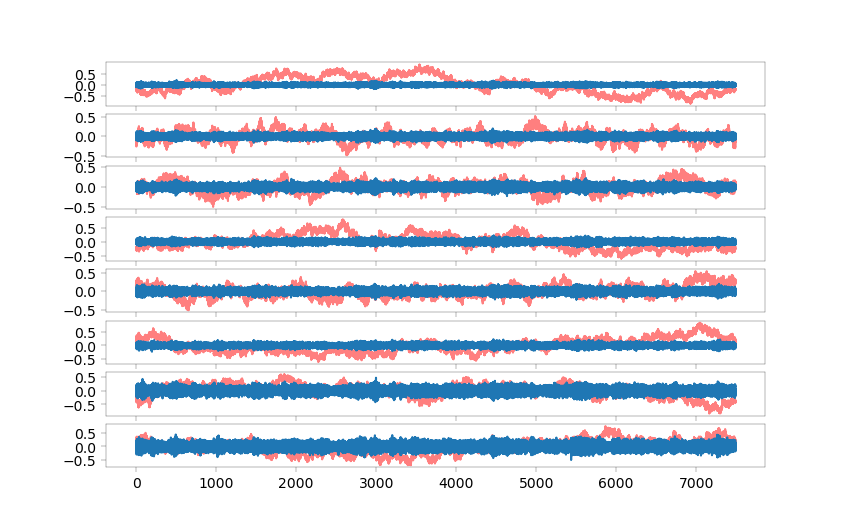

In [121]:
fig, axes = plt.subplots(acqui.num_channels,1)
for channel in range(acqui.num_channels):
    ax = axes[channel]
    ax.plot(acqui.t_vals, acqui.sensor_noise[channel,:], alpha=0.5, color='red')
    ax.plot(acqui.t_vals, acqui.signal[channel,:])
    # ax.twinx().plot(acqui.t_vals, acqui.signal_volt[channel,:], alpha=0.5, color='red')
    # ax.plot(acqui.t_vals_samp, acqui.signal_samp[channel,:], alpha=0.5)


In [38]:
if True:
    bits_effective, snr_db_est, snr_db,\
    f_sc, d_sc, phi_sc, mc_sc, \
    f_cf, d_cf, phi_cf, mc_cf, \
    f_sd, d_sd, phi_sd, mc_sd, \
    phi_indexer = stage2n3mapping(**fun_kwargs, jid=jid, result_dir=result_dir / 'samples', working_dir = working_dir, skip_existing=True )
else:
    
    with dm_grid.get_database('out') as out_ds:
        done_ids = (~out_ds['_runtimes'].isnull()) & (out_ds['_exceptions']=='')
        
    out_ds = out_ds.isel(ids=done_ids)
    jid = rng.choice(out_ds.ids)

    this_ds = out_ds.sel(ids = jid)
    f_sc = this_ds['f_sc'].data
    f_cf = this_ds['f_cf'].data
    f_sd = this_ds['f_sd'].data

    d_sc = this_ds['d_sc'].data
    d_cf = this_ds['d_cf'].data
    d_sd = this_ds['d_sd'].data

    phi_sc = this_ds['phi_sc'].data
    phi_cf = this_ds['phi_cf'].data
    phi_sd = this_ds['phi_sd'].data

    mc_sc = this_ds['mc_sc'].data
    mc_cf = this_ds['mc_cf'].data
    mc_sd = this_ds['mc_sd'].data

    phi_indexer = this_ds['phi_indexer'].data

### Compare sets of modal parameters

In [9]:
from model.mechanical import MechanicalDummy
mech = MechanicalDummy.load(fpath=result_dir / 'samples' / f'mechanical.npz')
phi_noddir = mech.damped_mode_shapes
f_model = mech.damped_frequencies
d_model = mech.modal_damping
mech.num_nodes

INFO:model.mechanical:Now loading previous results from  /usr/scratch4/sima9999/work/modal_uq/uq_oma_a/samples/mechanical.npz


203

INFO:pyOMA.core.PostProcessingTools:Statistics on identification: 
Δf = 0.000± 0.001,
Δd = 42.489± 41.624, 
MAC: mean = 0.986, min= 0.911, 
Number of unmatched modes: "a" 22, "b" 29


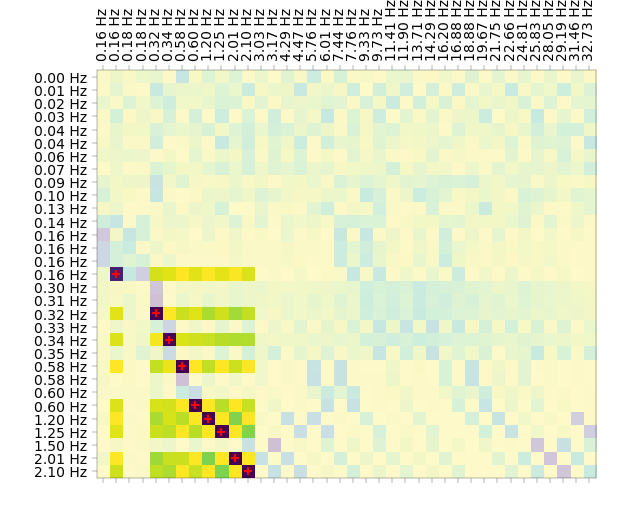

In [43]:
plt.close('all')
f_a, d_a, phi_a = f_model, d_model, phi_noddir

f_b, d_b, phi_b = f_sc, d_sc, phi_sc
# f_b, d_b, phi_b = f_cf, d_cf, phi_cf
# f_b, d_b, phi_b = f_sd, d_sd, phi_sd
# f_b, d_b, phi_b = acqui.modal_frequencies_samp[:], acqui.modal_damping_samp[:], acqui.mode_shapes_samp[:,:]

# clean up nan-modes from identification
mode_selector = ~np.isnan(f_b)
f_b = f_b[mode_selector]
d_b = d_b[mode_selector]
phi_b = phi_b[:, mode_selector]

# append all nan row to mode shapes to account for missing nodes
phi_b_ = np.concatenate([phi_b, np.full((1,phi_b.shape[1]), np.nan)],axis=0)

# transform "chan"-format to "(x,) y,z"-format
phi_b_noddir = phi_b_[phi_indexer,:]
phi_a_noddir = phi_a[:,[1,2],:]

# flatten both mode shapes again

phi_a_flat = phi_a_noddir.reshape(-1, phi_a_noddir.shape[-1], order='C')
phi_b_flat = phi_b_noddir.reshape(-1, phi_b_noddir.shape[-1], order='C')

# remove all nan-rows (missing nodes from acquisition)
node_selector = ~np.all(np.isnan(phi_b_flat), axis=1)

compare_modes(f_b, d_b, phi_b_flat[node_selector,:], f_a, d_a, phi_a_flat[node_selector,:])

pass

INFO:pyOMA.core.PostProcessingTools:Statistics on identification: 
Δf = -0.001± 0.002,
Δd = -0.820± 2.040, 
MAC: mean = 0.980, min= 0.898, 
Number of unmatched modes: "a" 2, "b" 90


NameError: name 'mc_a' is not defined

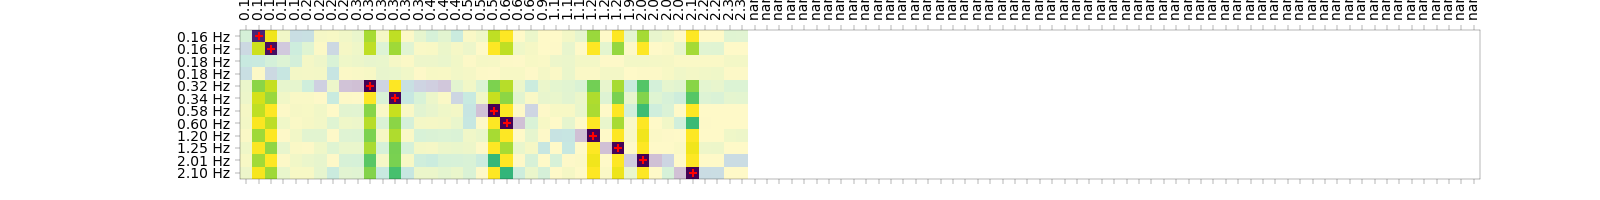

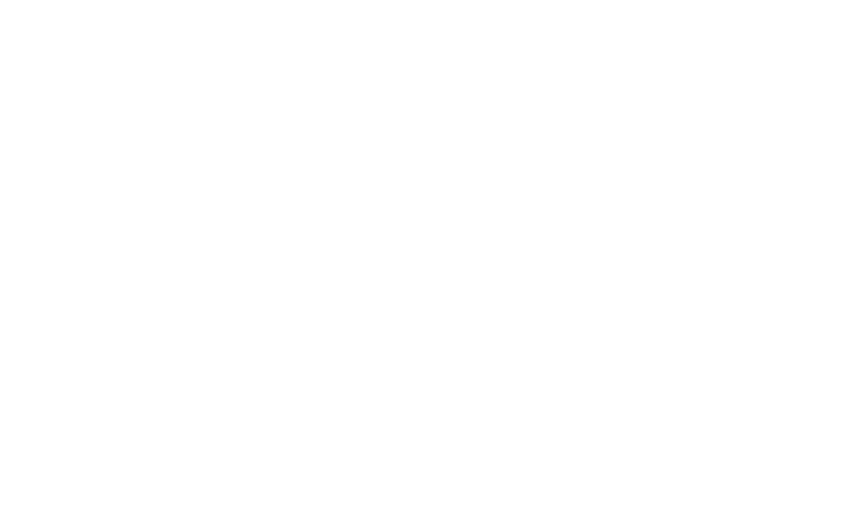

In [27]:
'''
possible sets:
- numerical: acqui.modal_frequencies_samp, ....
- single_order_modal: this_modal_frequencies, ...
- stabilization: stabil_calc.get_selected_modal_values()
- other means: -> assign f_ , d_ , phi_ accordingly
'''

# numerical results
f_a, d_a, phi_a = acqui.modal_frequencies_samp[:], acqui.modal_damping_samp[:], acqui.mode_shapes_samp[:,:]

# others (mapping results)
# f_a, d_a, phi_a, mc_a = f_sc, d_sc, phi_sc, mc_sc
# f_a, d_a, phi_a, mc_a = f_cf, d_cf, phi_cf, np.abs(mc_cf)
# f_a, d_a, phi_a, mc_a = f_sd, d_sd, phi_sd, mc_sd

# numerical results
# f_b, d_b, phi_b = acqui.modal_frequencies_samp, acqui.modal_damping_samp, acqui.mode_shapes_samp

# single_order_modal
# f_b, d_b, phi_b = this_modal_frequencies, this_modal_damping, this_mode_shapes

# stabilization
# f_b, d_b, phi_b = stabil_calc.get_selected_modal_values()[:3]

# others (mapping results)
f_b, d_b, phi_b, mc_b = f_sc, d_sc, phi_sc, mc_sc
# f_b, d_b, phi_b, mc_b = f_cf, d_cf, phi_cf, np.abs(mc_cf)
# f_b, d_b, phi_b, mc_b = f_sd, d_sd, phi_sd, mc_sd
inds_a, inds_b, unp_a, unp_b = compare_modes(f_a, d_a, phi_a, f_b, d_b, phi_b)


plt.figure()
plt.scatter(mc_a[inds_a], mc_b[inds_b])


### Convert db datatypes

In [12]:
import xarray as xr
dbfile = dm_grid.dbfile_out
dbpath = os.path.join(dm_grid.result_dir, dbfile)
ds = xr.open_dataset(dbpath, engine='h5netcdf')

In [13]:
# ds.bits_effective.astype('float32')
names = ['bits_effective', 'snr_db_est', 'snr_db', 'f_sc', 'd_sc', 'mc_sc', 'f_cf', 'd_cf', 'f_sd', 'd_sd', 'mc_sd'] #float64 -> float32
for name in names:
    
    print(name, ds[name].dtype)
    
    ds[name] = ds[name].astype('float32')
ds['mc_cf'] = np.abs(ds['mc_cf']).astype('float32')
names = ['phi_sc','phi_cf', 'phi_sd'] # 'complex128 -> 'complex64'

for name in names:
    print(name, ds[name].dtype)
    ds[name] = ds[name].astype('complex64')

ds['phi_indexer'] = ds['phi_indexer'].astype('uint8')

bits_effective float64
snr_db_est float64
snr_db float64
f_sc float64
d_sc float64
mc_sc float64
f_cf float64
d_cf float64
f_sd float64
d_sd float64
mc_sd float64
phi_sc complex128
phi_cf complex128
phi_sd complex128


In [33]:
ds.close()
tempfile = dbpath + '.tmp'
ds.to_netcdf(tempfile, engine='h5netcdf', invalid_netcdf=True)

### Check done/missing samples

In [4]:
with dm_grid.get_database(database='in') as in_ds, dm_grid.get_database('out') as out_ds:
    done_ids = (~out_ds['_runtimes'].isnull()) & (out_ds['_exceptions']=='')
    in_ds = in_ds.isel(ids=~done_ids)
    ids = in_ds.ids


In [5]:
ids

<xarray.DataArray 'ids' (ids: 29)>
array(['d691245f_f5b703ae', '75d40ec0_f5b703ae', '7ba46003_f5b703ae',
       '2dc39f1a_f5b703ae', '6997cf85_f5b703ae', 'd0a1edd6_f5b703ae',
       '8f0b62a0_f5b703ae', '8f4f0f17_f5b703ae', '2e75a5d9_f5b703ae',
       'ef1698c9_f5b703ae', 'befdce61_f5b703ae', '418e8aaa_f5b703ae',
       '706f2c35_f5b703ae', 'd3f44145_d3880d6f', 'd77fbb7c_f5b703ae',
       'fef264c3_f5b703ae', '23f0d863_f5b703ae', '13c66606_f5b703ae',
       '28481501_f5b703ae', '2849553d_f5b703ae', '6b8b0bba_f5b703ae',
       'df1f905a_f5b703ae', 'ba455d47_f5b703ae', '6bf0ea6b_f5b703ae',
       'cd25ef3a_f5b703ae', '3349c853_f5b703ae', '2e9a8151_f5b703ae',
       'fa8dac26_f5b703ae', '27083753_f5b703ae'], dtype=object)
Coordinates:
  * ids      (ids) object 'd691245f_f5b703ae' ... '27083753_f5b703ae'

In [22]:
ids_filter = np.char.array(ids).startswith(b'9')
out_ds.isel(ids=~done_ids).isel(ids=ids_filter)['_exceptions']

<xarray.DataArray '_exceptions' (ids: 0)>
array([], dtype=object)
Coordinates:
  * ids      (ids) object

In [13]:
'''
QR failures

13c66606_f5b703ae

208230e3_f5b703ae
23f0d863_f5b703ae
27083753_f5b703ae
2849553d_f5b703ae
28481501_f5b703ae
2dc39f1a_f5b703ae
2e9a8151_f5b703ae
2e75a5d9_f5b703ae

3349c853_f5b703ae

418e8aaa_f5b703ae

5.......: no errors

6997cf85_f5b703ae
6b8b0bba_f5b703ae
6bf0ea6b_f5b703ae

75d40ec0_f5b703ae

8f0b62a0_f5b703ae
8f4f0f17_f5b703ae

9........: no errors

a........: no errors


'''

<xarray.DataArray 'm_lags' ()>
array(539)

In [ ]:
files_to_sync = []
j = 0
for jid in np.char.array(np.sort(out_ds.isel(ids=~done_ids).isel(ids=ids_filter)['ids'].data)):
    # print(jid)
    # print(out_ds.sel(ids=jid.decode('UTF-8'))['_exceptions'])

    id_ale, id_epi = jid.split(b'_')
    resp_dir = result_dir / 'samples' / id_ale.decode('UTF-8')
    if not os.path.exists(resp_dir):
        os.makedirs(resp_dir)
    modal_file = resp_dir / id_epi.decode('UTF-8') / 'modal.npz'
    if not os.path.exists(modal_file):
        print(modal_file, ' does not exist')
        j+=1
    response_file = resp_dir / 'response.npz'
    if os.path.exists(response_file):
        print(f'{response_file} exists')
    elif response_file in files_to_sync:
        print(f'{response_file} already in file list')
    else:
        files_to_sync.append(response_file)
        print(f'{response_file} added to file list')
j

In [ ]:
for file in files_to_sync:
    print(f"./sshpass -p 'yt82[Si%' rsync {str(file).replace('/scratch/sima9999/', '/vegas/scratch/womo1998/')} sima9999@csdata.tu-ilmenau.de:{file}")

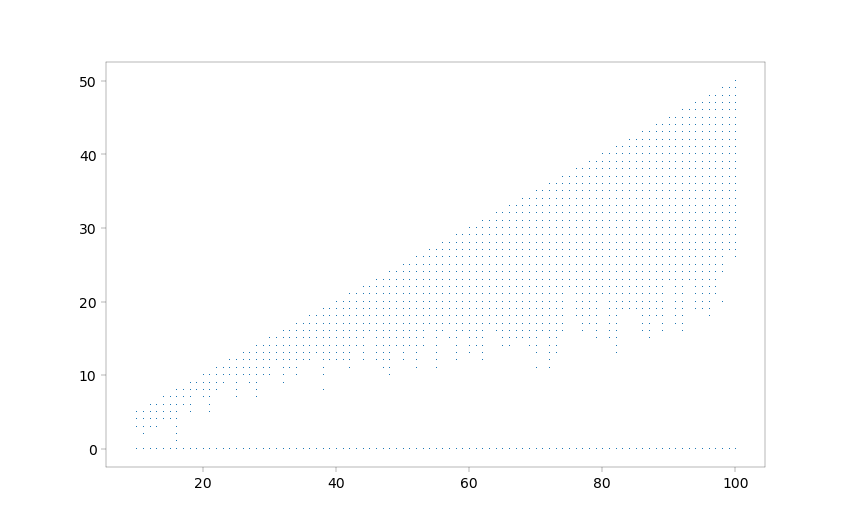

In [16]:

plt.figure()


plt.plot(in_ds.model_order, (~np.isnan(out_ds.f_sc)).sum(dim='mode'),  marker=',',ls='none')

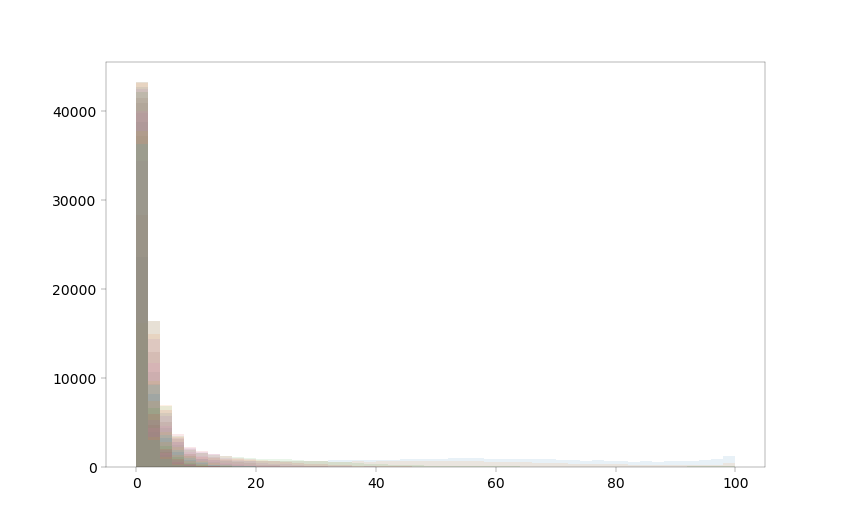

In [74]:
plt.figure()
for mode in range(20):
    plt.hist(out_ds.isel(ids=ids_filter).d_sc.isel(mode=mode), bins=50, alpha=0.1)

# Continue

- [ ] Cleanup Notebook (Copy thoughts and decisions to the top and transfer relevant parts to UQ_OMA)

- [x] verify SNR estimate and true SNR for stage 2
- [x] Verify sampled modal parameters (from database) against model modal parameters